# Multicollinearity

The goal of using linear model is to understand the impact of the used features on the target, individually.

Multicollinearity makes that impossible to understand.

For example, we have 2 features 1) years left to retire, 2) years of work experience and the target is age. The linear model coefficient will be 1) 0.5 for years left to retire and 2) -0.5 for years of work experience. When in reality, it should be 1.0

Unfortunately, detecting multicollinearity is never easy. It requires domain knowledge

In [177]:
# Import required Python packages
import pandas as pd
import matplotlib.pyplot as plt

import random
%matplotlib widget

In [178]:
# Create DataFrame
age_column_name = "age"
age_list = [age for age in range(20, 64, 2)]                                                                                                                          # target

years_of_work_experience_column_name = "years of work"
starting_age_to_work = 20
years_of_work_experience_corr_with_target_ratio = 0.7
years_of_work_experience = [age - starting_age_to_work if len(age_list) * years_of_work_experience_corr_with_target_ratio > index else random.randint(20, 63) for index, age in enumerate(age_list)]   # highly positive correlated with age

years_left_to_retire_column_name = "years left to retire"
retirement_age = 63
years_left_to_retire_corr_with_target_ratio = 0.7
years_left_to_retire_list = [retirement_age - age if len(age_list) * years_left_to_retire_corr_with_target_ratio > index else random.randint(20, 63) for index, age in enumerate(age_list)]            # highly negative correlated with age

df = pd.DataFrame(data={
    years_of_work_experience_column_name: years_of_work_experience,
    years_left_to_retire_column_name: years_left_to_retire_list,
    age_column_name: age_list,
})

feature_column_names = df.drop(columns=[age_column_name])

df

,years of work,years left to retire,age
0,0,43,20
1,2,41,22
2,4,39,24
3,6,37,26
4,8,35,28
5,10,33,30
6,12,31,32
7,14,29,34
8,16,27,36
9,18,25,38


In [179]:
corr = df.drop(columns=[age_column_name]).corr()
corr.style.background_gradient(cmap="coolwarm").format(precision=1)

,years of work,years left to retire
years of work,1.0,-0.1
years left to retire,-0.1,1.0


Text(0.5, 0, 'age')

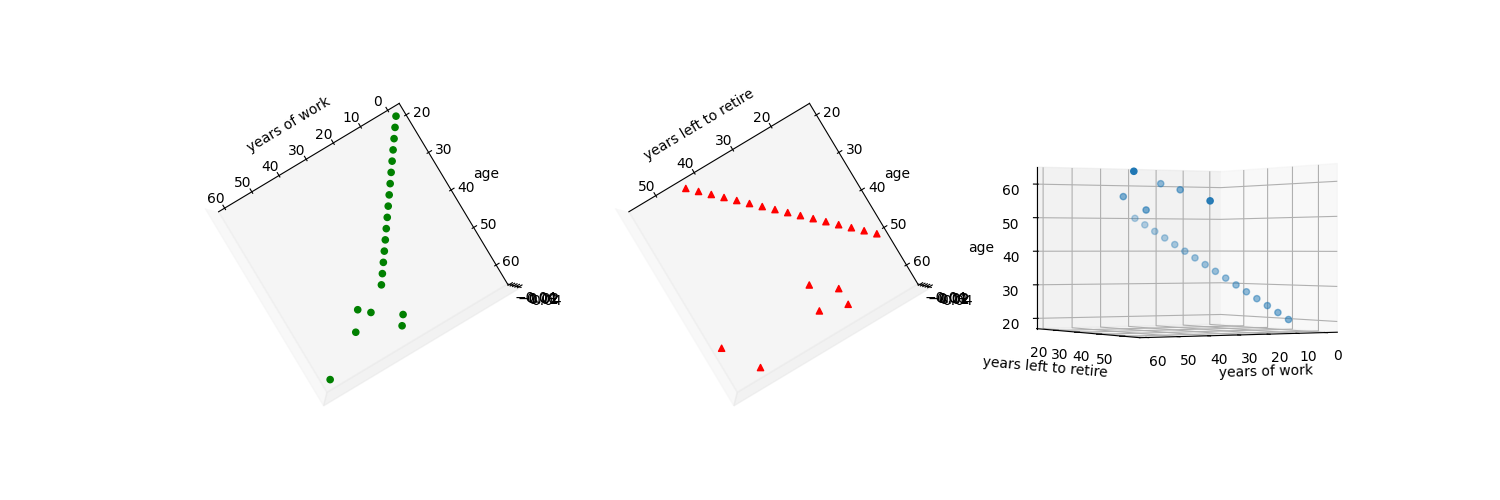

In [180]:
fig, axes = plt.subplots(1,3, figsize=(15,5), subplot_kw={'projection': '3d'})

df.plot.scatter(x=years_of_work_experience_column_name, y=age_column_name, ax=axes[0], marker='o', color='green')
axes[0].view_init(90, 60)

df.plot.scatter(x=years_left_to_retire_column_name, y=age_column_name, ax=axes[1], marker='^', color='red')
axes[1].view_init(90, 60)

axes[2].scatter(xs=df[years_of_work_experience_column_name], ys=df[years_left_to_retire_column_name], zs=df[age_column_name])
axes[2].view_init(0, 60)
axes[2].set_xlabel(years_of_work_experience_column_name)
axes[2].set_ylabel(years_left_to_retire_column_name)
axes[2].set_zlabel(age_column_name)

# Data Preprocessing

In [181]:
# Import the required Python packages
from sklearn.model_selection import train_test_split

In [182]:
X_1 = df.drop(columns=[age_column_name])
X_2 = df.drop(columns=[age_column_name, years_of_work_experience_column_name])
y = df[age_column_name]

In [183]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.2, random_state=42)

# Model Training

In [184]:
# Import the required Python packages
from sklearn.linear_model import LinearRegression

In [185]:
# 0.5 * years of work experience + -0.5 * years of left to retire
# how to interpret?
reg_1 = LinearRegression().fit(X_train_1, y_train_1)
reg_1.intercept_, reg_1.coef_

(np.float64(28.657190558714547), array([ 0.80530266, -0.16251394]))

In [186]:
reg_2 = LinearRegression().fit(X_train_2, y_train_2)
reg_2.intercept_, reg_2.coef_

(np.float64(40.74327840416305), array([0.06736051]))

# Model Evaluation

In [187]:
# Import the required Python packages
from sklearn.metrics import r2_score

In [188]:
y_test_pred_1 = reg_1.predict(X_test_1)
df_eval_1 = pd.DataFrame(data={
    "y_test": y_test_1,
    "y_test_pred": y_test_pred_1
})
df_eval_1 = pd.concat([X_test_1, df_eval_1], axis=1)
df_eval_1

,years of work,years left to retire,y_test,y_test_pred
0,0,43,20,21.669091
13,26,17,46,46.832323
8,16,27,36,37.154157
1,2,41,22,23.604724
15,30,13,50,50.703589


In [189]:
y_test_pred_2 = reg_2.predict(X_test_2)
df_eval_2 = pd.DataFrame(data={
    "y_test": y_test_2,
    "y_test_pred": y_test_pred_2
})
df_eval_2 = pd.concat([X_test_2, df_eval_2], axis=1)
df_eval_2

,years left to retire,y_test,y_test_pred
0,43,20,43.639780
13,17,46,41.888407
8,27,36,42.562012
1,41,22,43.505059
15,13,50,41.618965


In [190]:
r2_score(y_true=y_test_1, y_pred=y_test_pred_1), r2_score(y_true=y_test_2, y_pred=y_test_pred_2)

(0.9893616595461198, -0.5544191861883951)

Text(0.5, 0, 'age')

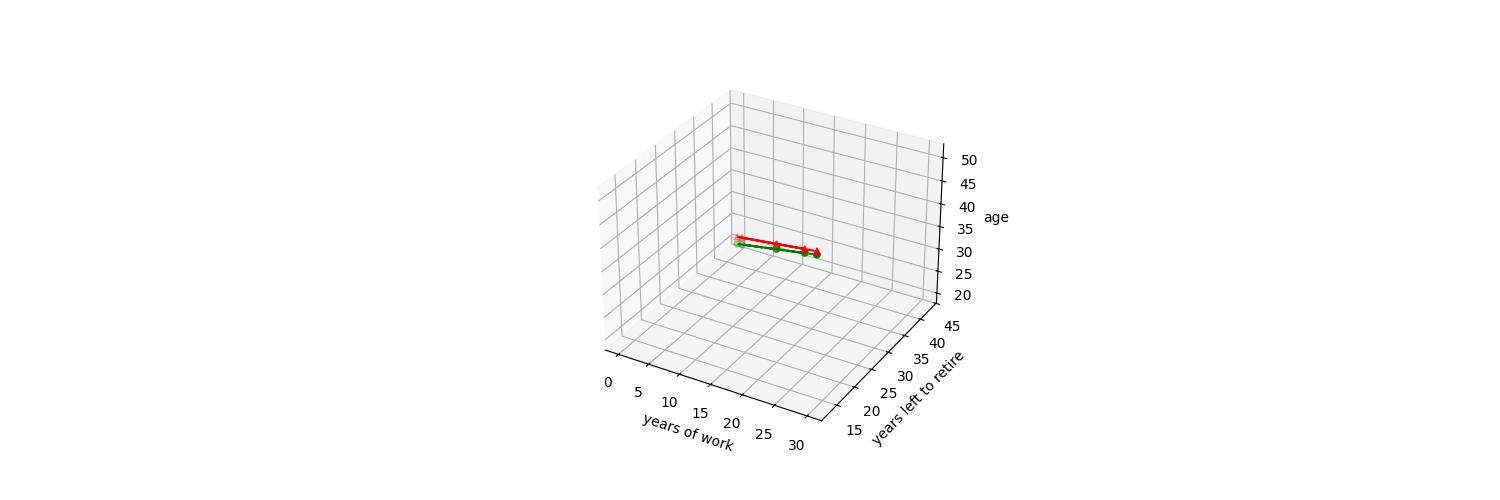

In [191]:
fig, ax = plt.subplots(1, 1, figsize=(15,5), subplot_kw={'projection': '3d'})
ax.scatter(xs=df_eval_1[years_of_work_experience_column_name], ys=df_eval_1[years_left_to_retire_column_name], zs=df_eval_1["y_test"], marker='o', color='green')
ax.scatter(xs=df_eval_1[years_of_work_experience_column_name], ys=df_eval_1[years_left_to_retire_column_name], zs=df_eval_1["y_test_pred"], marker='^', color='red')

ax.plot(xs=df_eval_1[years_of_work_experience_column_name], ys=df_eval_1[years_left_to_retire_column_name], zs=df_eval_1["y_test"], linestyle='--', color='green')
ax.plot(xs=df_eval_1[years_of_work_experience_column_name], ys=df_eval_1[years_left_to_retire_column_name], zs=df_eval_1["y_test_pred"], linestyle='--', color='red')

ax.set_xlabel(years_of_work_experience_column_name)
ax.set_ylabel(years_left_to_retire_column_name)
ax.set_zlabel(age_column_name)

Text(0, 0.5, 'years left to retire')

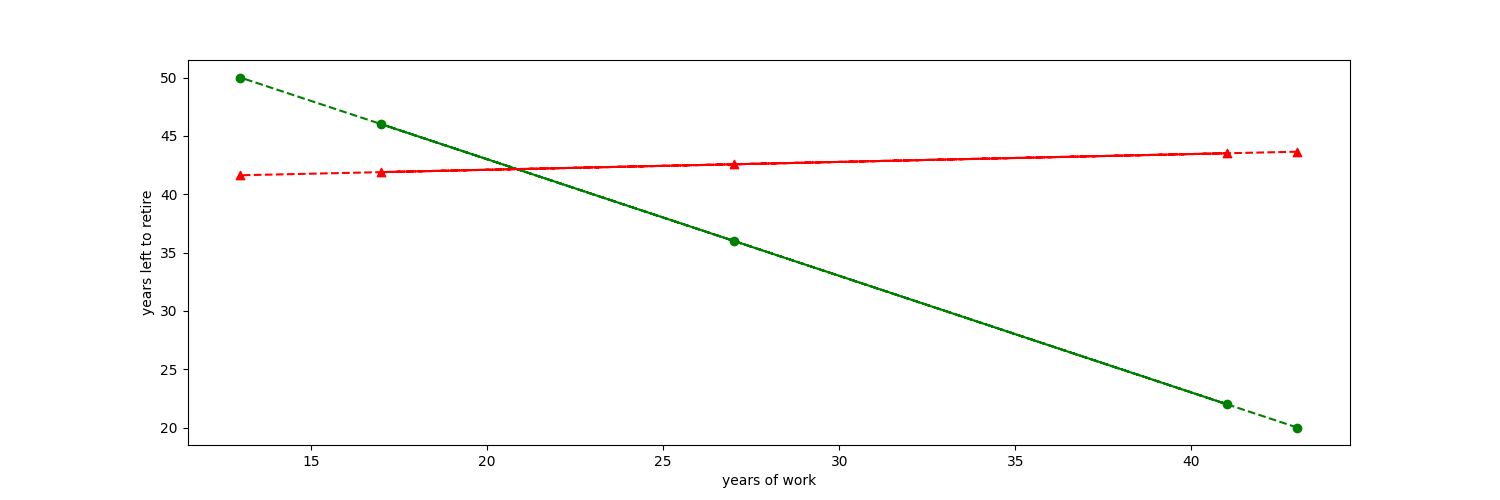

In [192]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.scatter(x=df_eval_2[years_left_to_retire_column_name], y=df_eval_2["y_test"], marker='o', color='green')
ax.scatter(x=df_eval_2[years_left_to_retire_column_name], y=df_eval_2["y_test_pred"], marker='^', color='red')

ax.plot(df_eval_2[years_left_to_retire_column_name], df_eval_2["y_test"], linestyle='--', color='green')
ax.plot(df_eval_2[years_left_to_retire_column_name], df_eval_2["y_test_pred"], linestyle='--', color='red')

ax.set_xlabel(years_of_work_experience_column_name)
ax.set_ylabel(years_left_to_retire_column_name)